In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import requests
import ast

In [2]:
df = pd.read_csv('../data/data_final.csv')

In [3]:
df

,ID,Name,Primary Type,Secondary Type,Image,Additional Images
0,#001,bulbasaur,Grass,Poison,https://img.pokemondb.net/sprites/bank/normal/...,['https://img.pokemondb.net/artwork/bulbasaur....
1,#002,ivysaur,Grass,Poison,https://img.pokemondb.net/sprites/bank/normal/...,['https://img.pokemondb.net/artwork/ivysaur.jp...
2,#003,venusaur,Grass,Poison,https://img.pokemondb.net/sprites/bank/normal/...,['https://img.pokemondb.net/artwork/venusaur.j...
3,#004,charmander,Fire,NaN,https://img.pokemondb.net/sprites/bank/normal/...,['https://img.pokemondb.net/artwork/charmander...
4,#005,charmeleon,Fire,NaN,https://img.pokemondb.net/sprites/bank/normal/...,['https://img.pokemondb.net/artwork/charmeleon...
...,...,...,...,...,...,...
893,#894,regieleki,Electric,NaN,https://img.pokemondb.net/sprites/sword-shield...,['https://img.pokemondb.net/artwork/regieleki....
894,#895,regidrago,Dragon,NaN,https://img.pokemondb.net/sprites/sword-shield...,['https://img.pokemondb.net/artwork/regidrago....
895,#896,glastrier,Ice,NaN,https://img.pokemondb.net/sprites/sword-shield...,['https://img.pokemondb.net/artwork/glastrier....
896,#897,spectrier,Ghost,NaN,https://img.pokemondb.net/sprites/sword-shield...,['https://img.pokemondb.net/artwork/spectrier....


In [4]:
from skimage import io, color, filters

from PIL import Image
import requests
from io import BytesIO
from imageio import imread

In [5]:
url = df['Image'].loc[0]
im = Image.open(requests.get(url, stream=True).raw)

In [6]:
im = im.convert('RGBA')
im.size

(128, 128)

In [7]:
a = np.array(im)[:,:,0:3]

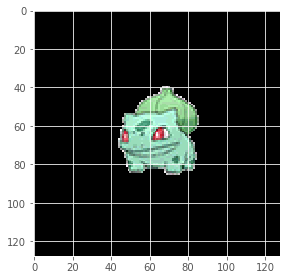

In [8]:
io.imshow(a)

In [9]:
a.shape

(128, 128, 3)

In [10]:
dict1 = {}

In [11]:
dict1['pokemon'] = 'bulbasaur'

In [12]:
dict1['image'] = a

In [13]:
dict1['types'] = df['Primary Type'].loc[0]

In [14]:
dict1

{'pokemon': 'bulbasaur',
 'image': array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 'types': 'Grass'}

In [15]:
df['Additional Images'].loc[0]

"['https://img.pokemondb.net/artwork/bulbasaur.jpg', 'https://img.pokemondb.net/sprites/red-blue/normal/bulbasaur.png', 'https://img.pokemondb.net/sprites/silver/normal/bulbasaur.png', 'https://img.pokemondb.net/sprites/ruby-sapphire/normal/bulbasaur.png', 'https://img.pokemondb.net/sprites/diamond-pearl/normal/bulbasaur.png', 'https://img.pokemondb.net/sprites/black-white/normal/bulbasaur.png', 'https://img.pokemondb.net/sprites/x-y/normal/bulbasaur.png', 'https://img.pokemondb.net/sprites/sword-shield/normal/bulbasaur.png', 'https://img.pokemondb.net/sprites/silver/shiny/bulbasaur.png', 'https://img.pokemondb.net/sprites/ruby-sapphire/shiny/bulbasaur.png', 'https://img.pokemondb.net/sprites/diamond-pearl/shiny/bulbasaur.png', 'https://img.pokemondb.net/sprites/black-white/shiny/bulbasaur.png', 'https://img.pokemondb.net/sprites/x-y/shiny/bulbasaur.png']"

In [16]:
for i in range(df.shape[0]):
    url = df['Image'].loc[i]
    im = Image.open(requests.get(url, stream=True).raw)
    im = im.convert('RGBA')
    a = np.array(im)[:,:,0:3]
    image = Image.fromarray(a)
    if str(df['Secondary Type'].loc[i]) != 'nan':
        image.save('../images/'+df['Primary Type'].loc[i]+'/'+df['Name'].loc[i]+'_0'+'.png')
        image.save('../images/'+df['Secondary Type'].loc[i]+'/'+df['Name'].loc[i]+'_0'+'.png')
    else:
        image.save('../images/'+df['Primary Type'].loc[i]+'/'+df['Name'].loc[i]+'_0'+'.png')

In [17]:
for i in range(df.shape[0]):    
    for index, image in enumerate(ast.literal_eval(df['Additional Images'].loc[i])):
        if image.find('shiny') == -1:
            url = image
            im = Image.open(requests.get(url, stream=True).raw)
            im = im.convert('RGBA')
            a = np.array(im)[:,:,0:3]
            image = Image.fromarray(a)
            if str(df['Secondary Type'].loc[i]) != 'nan':
                image.save('../images/'+df['Primary Type'].loc[i]+'/'+df['Name'].loc[i]+'_'+str(index+1)+'.png')
                image.save('../images/'+df['Secondary Type'].loc[i]+'/'+df['Name'].loc[i]+'_'+str(index+1)+'.png')
            else:
                image.save('../images/'+df['Primary Type'].loc[i]+'/'+df['Name'].loc[i]+'_'+str(index+1)+'.png')

KeyboardInterrupt: 

In [ ]:
'../images/'+df['Primary Type'].loc[i]+'/'+df['Name'].loc[i]+'_'+str(index+1)+'.png'

In [18]:
type_count = df['Primary Type'].value_counts()+df['Secondary Type'].value_counts()

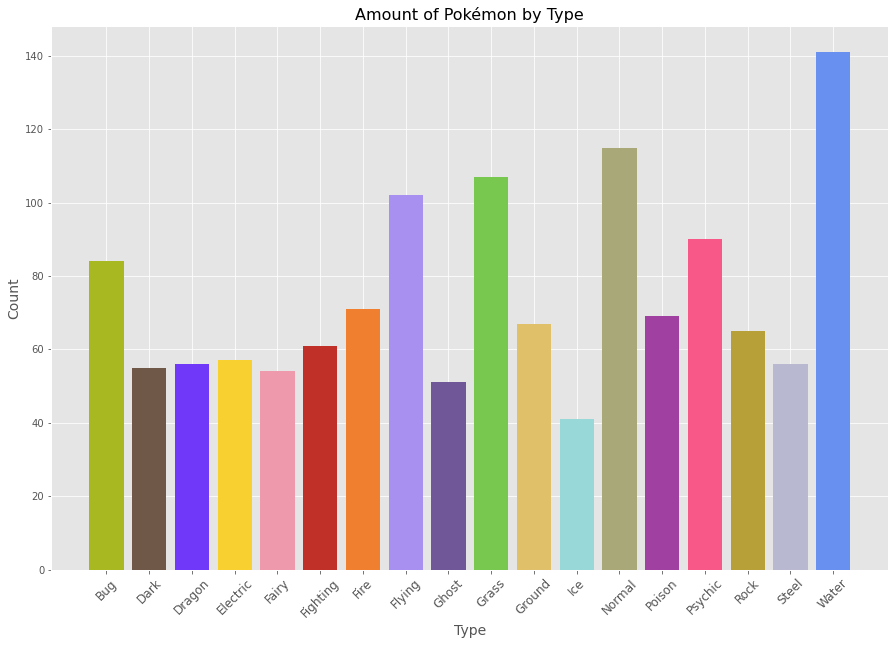

In [38]:
fig,ax = plt.subplots(figsize= (15,10))
ax.bar(range(0,18), type_count, color = colors)
ax.set_xticks(range(0,18))
ax.set_xticklabels(type_count.index, size = 12)
plt.xticks(rotation = 45);
ax.set_xlabel('Type', size = 14)
ax.set_ylabel('Count', size = 14)
ax.set_title('Amount of Pokémon by Type', size = 16)
plt.savefig('../images/type_distribution.png')

In [24]:
colors = ['#a8b820', '#705848', '#7038f8','#f8D030','#ee99ac','#c03028','#f08030','#a890f0','#705898','#78c850','#e0C068','#98d8d8','#a8a878','#a040a0','#f85888','#b8a038','#b8b8D0','#6890f0']


In [31]:
types_count2= np.array([ 888,  575,  529,  492,  503,  527,  620, 1341,  484,  988,  825,
        441, 1012,  874,  936,  788,  593, 1462])

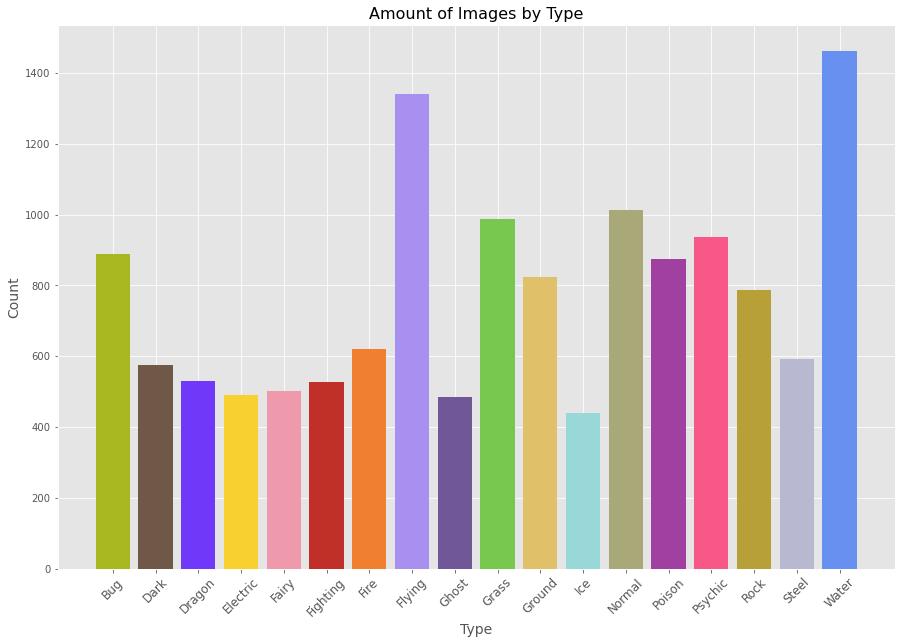

In [43]:
fig,ax = plt.subplots(figsize= (15,10))
ax.bar(range(0,18), types_count2, color = colors)
ax.set_xticks(range(0,18))
ax.set_xticklabels(type_count.index, size = 12)
plt.xticks(rotation = 45);
ax.set_xlabel('Type', size = 14)
ax.set_ylabel('Count', size = 14)
ax.set_title('Amount of Images by Type', size = 16)
plt.savefig('../images/image_distribution.png')

In [42]:
plt.savefig('../images/image_distribution.png')

<Figure size 432x288 with 0 Axes>